In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Air_lines_cleaned.csv')

In [4]:
df.columns

Index(['DayOfWeek', 'Date', 'DepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'Airline', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Org_Airport', 'Dest', 'Dest_Airport', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

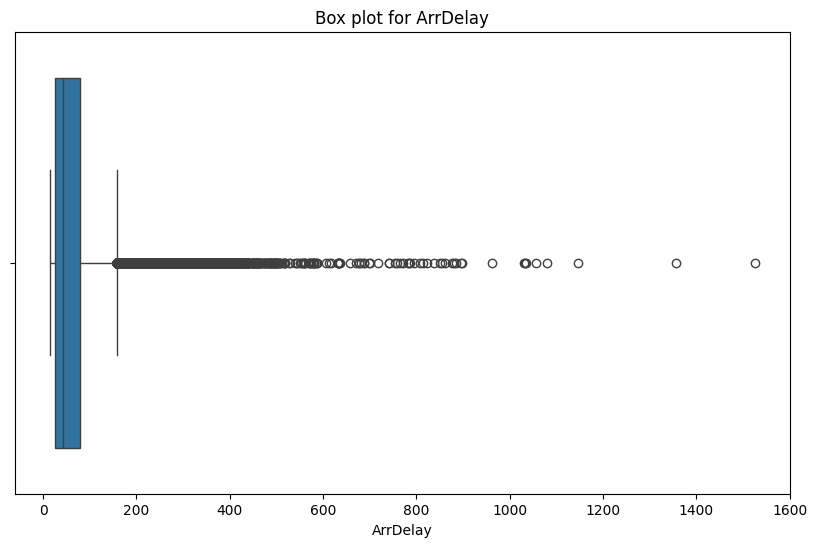

In [6]:
#knowing the outlier in the arrival delay using boxplot  
plt.figure(figsize=(10,6))
sns.boxplot(x=df['ArrDelay'])
plt.title('Box plot for ArrDelay')
plt.show()

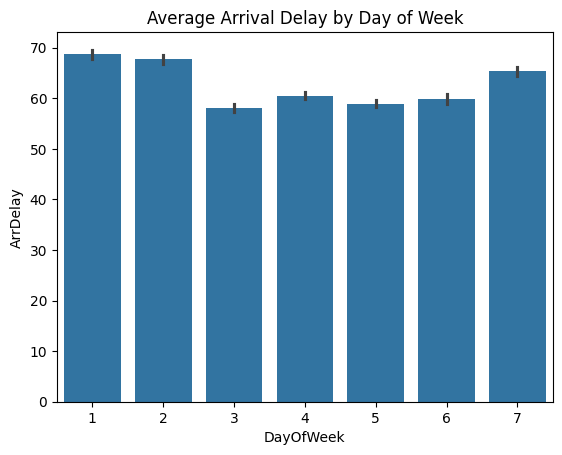

In [7]:
sns.barplot(data=df, x='DayOfWeek', y='ArrDelay', estimator='mean')
plt.title("Average Arrival Delay by Day of Week")
plt.show()

<Axes: >

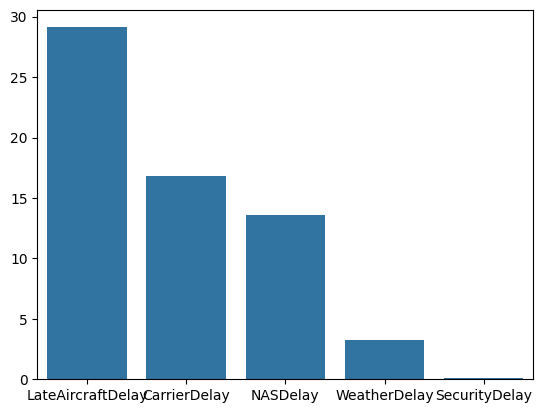

In [9]:
delay_cols=['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
means=df[delay_cols].mean().sort_values(ascending=False)
sns.barplot(data=means)

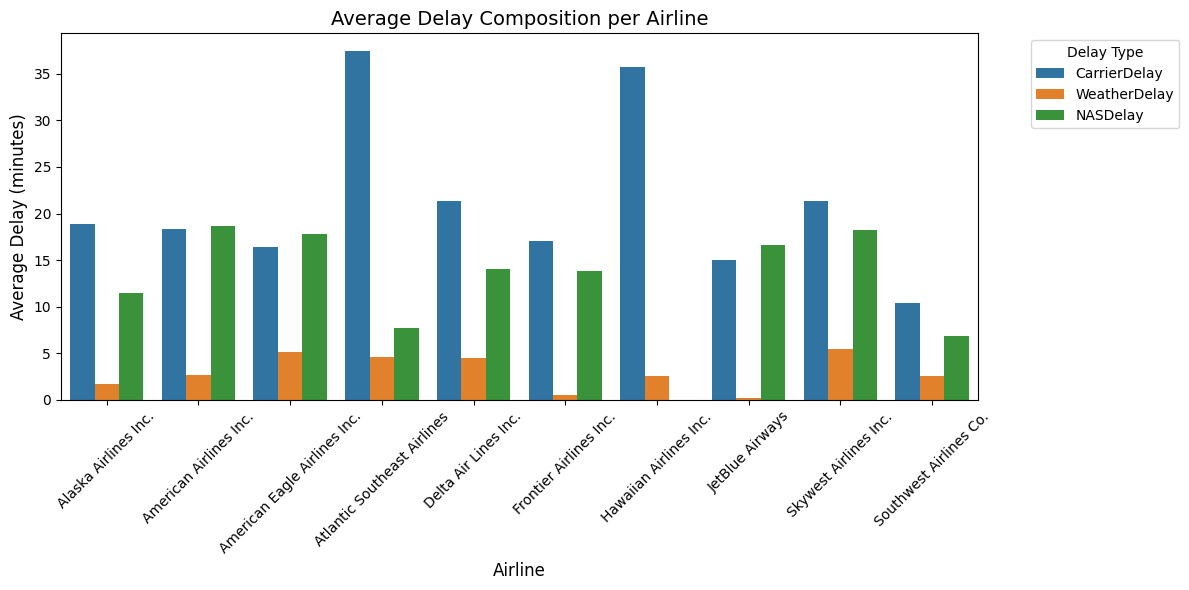

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay']
delay_by_airline = df.groupby('Airline')[delay_cols].mean().reset_index().head(10)

delay_melted = delay_by_airline.melt(
    id_vars='Airline', 
    value_vars=delay_cols, 
    var_name='DelayType', 
    value_name='AverageDelay'
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=delay_melted, 
    x='Airline', 
    y='AverageDelay', 
    hue='DelayType'
)

plt.title('Average Delay Composition per Airline', fontsize=14)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.legend(title='Delay Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


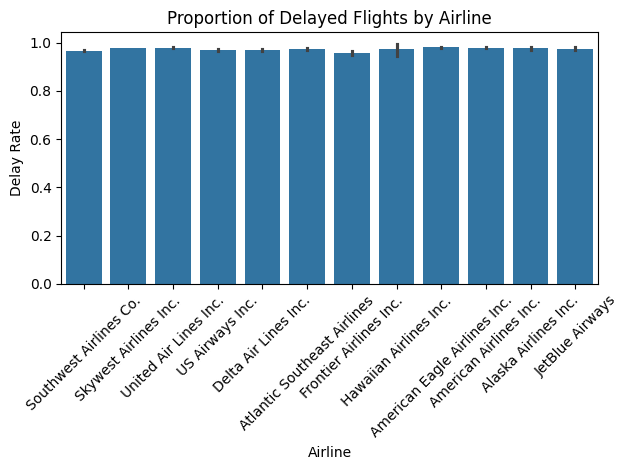

In [24]:
#percentage of airflights delayed per airline
df['Delayed'] = df['ArrDelay'] > 15
sns.barplot(data=df, x='Airline', y='Delayed',hue=)
plt.title("Proportion of Delayed Flights by Airline")
plt.xticks(rotation=45)
plt.ylabel("Delay Rate")
plt.tight_layout()
plt.show()


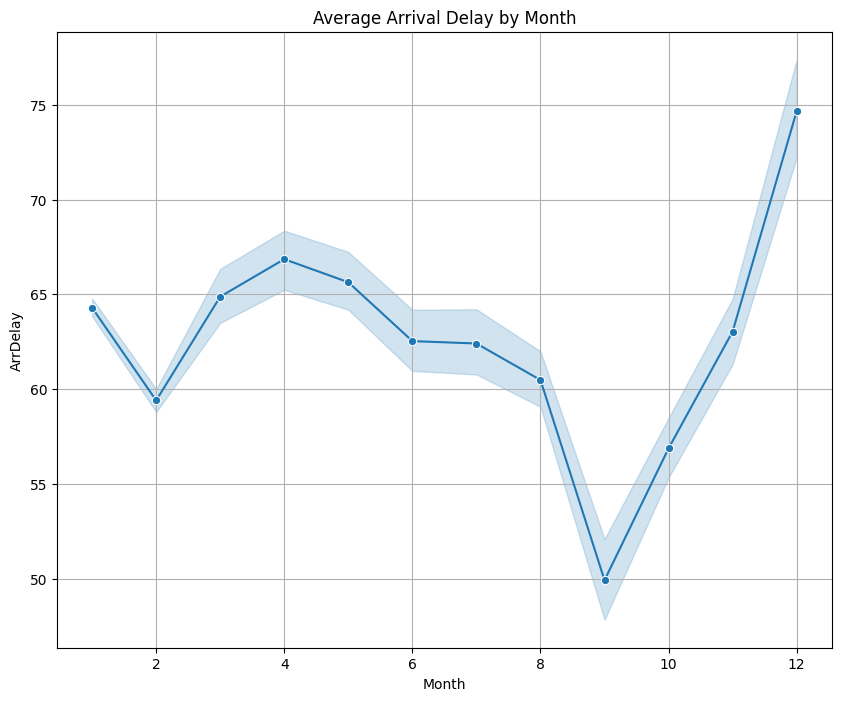

In [29]:
#observing monthly/seasonal patterns
df['Month'] = pd.to_datetime(df['Date'],format='mixed').dt.month
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x='Month', y='ArrDelay',marker='o')
plt.title("Average Arrival Delay by Month")
plt.grid()
plt.show()

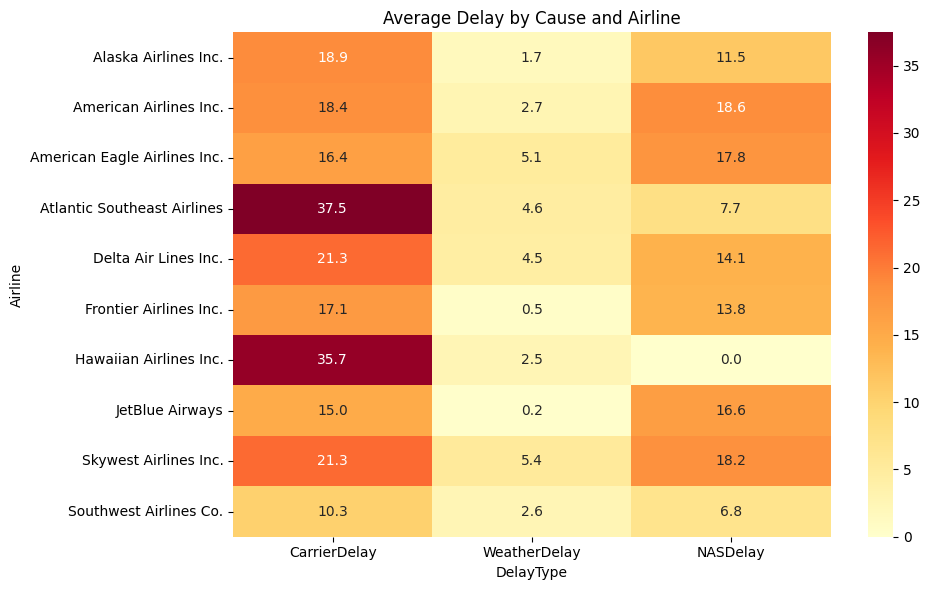

In [35]:
plt.figure(figsize=(10,6))
delay_by_airlines = df.groupby('Airline')[delay_cols].mean().head(10)
delay_by_airlines = delay_by_airlines.apply(pd.to_numeric, errors='coerce')
sns.heatmap(delay_by_airlines,cmap='YlOrRd',annot=True,fmt='.1f')
plt.title('Average Delay by Cause and Airline')
plt.xlabel('DelayType')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()

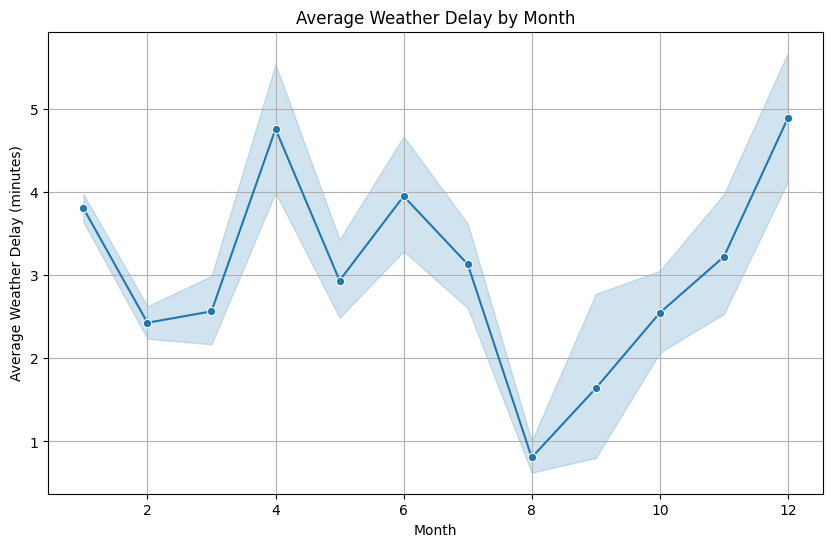

In [42]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Month', y='WeatherDelay',marker='o')
plt.title("Average Weather Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Weather Delay (minutes)")
plt.grid()
plt.show()

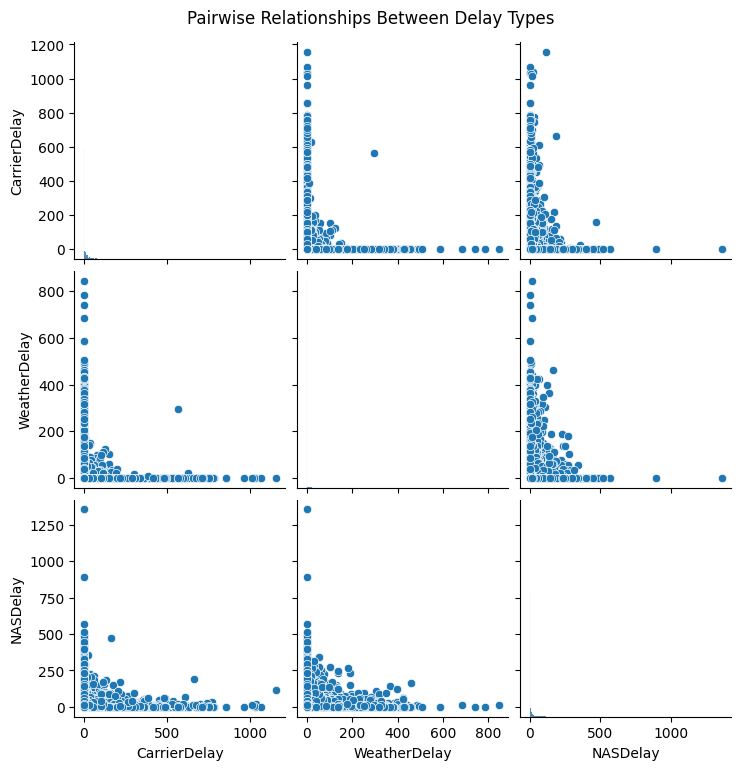

In [43]:
sns.pairplot(df[delay_cols])
plt.suptitle("Pairwise Relationships Between Delay Types", y=1.02)
plt.show()

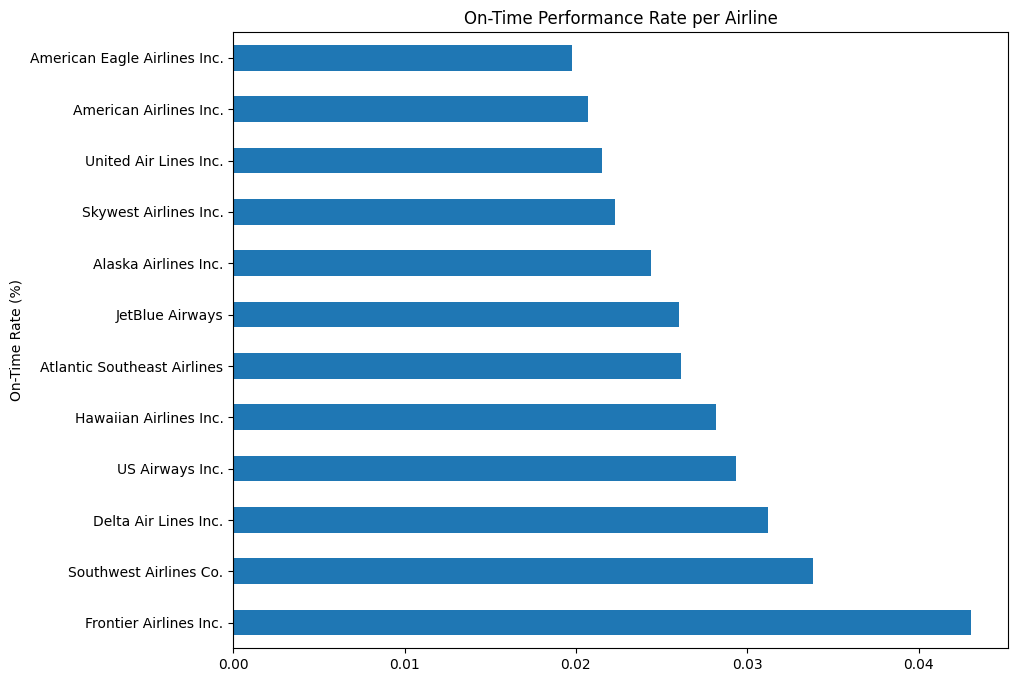

In [54]:
#estimating on-time flights per airline 
df['OnTime'] = df['ArrDelay'] <= 15
ontime_rate = df.groupby('Airline')['OnTime'].mean().sort_values(ascending=False)

ontime_rate.plot(kind='barh', figsize=(10,8))
plt.title("On-Time Performance Rate per Airline")
plt.ylabel("On-Time Rate (%)")
plt.show()